Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

Hypotheses Generation:

City: Tier 1 or urban cities should have higher sales because of the higher income levels of people there compaed to Tier 3 cities.

Location: Stores that are near famous locations of the city may have higher sales because of more reach of customers.

Visibility: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

Loading Packages & Data:

In [6]:
import pandas as pd
dataset = pd.read_csv('C:/Users/Mayur/Documents/Everything/aMJay/Technocolabs/Mini Project/DataSet/Train.csv')
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Data Structure & Content:

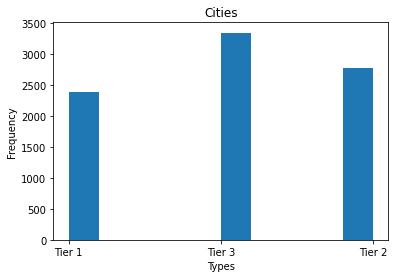

In [7]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(dataset['Outlet_Location_Type'])
plt.title('Cities')
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.show()

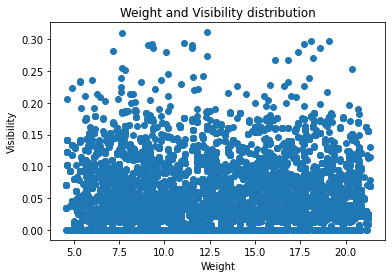

In [8]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
#Variable
ax.scatter(dataset['Item_Weight'],dataset['Item_Visibility'])
#Labels and Tit
plt.title('Weight and Visibility distribution')
plt.xlabel('Weight')
plt.ylabel('Visibility')
plt.show()

<Figure size 720x432 with 0 Axes>

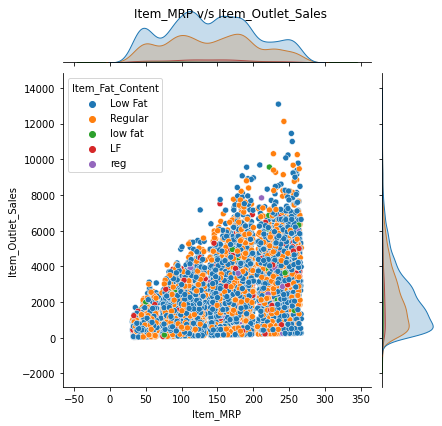

In [10]:
import seaborn as sns 
plt.figure(figsize=(10,6))

p=sns.jointplot(y='Item_Outlet_Sales',x='Item_MRP',data=dataset,hue='Item_Fat_Content')
p.fig.suptitle("Item_MRP v/s Item_Outlet_Sales")
plt.show()

c:\Users\Mayur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

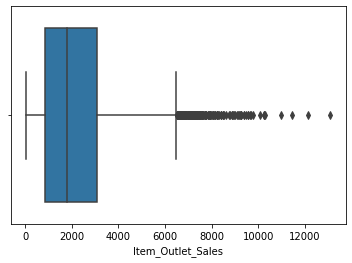

In [11]:
sns.boxplot(dataset['Item_Outlet_Sales']) 

In [12]:
test= dataset.groupby(['Item_Fat_Content'])
test.size()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
dtype: int64

Exploratory Data Analysis:

In [13]:
#Create Sample dataframe
import numpy as np
from random import sample
# create random index
rindex = np.array(sample(range(len(dataset)), 20))
# get 5 random rows from the dataframe df
datasetr = dataset.loc[rindex]
print (datasetr)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
1345           FDM36       11.650          Regular         0.058720   
6031           NCN55       14.600          Low Fat         0.059733   
8007           FDG47       12.800          Low Fat         0.116528   
1341           FDI20       19.100          Low Fat         0.038642   
6809           FDW55       12.600          Regular         0.021952   
4459           NCL53        7.500          Low Fat         0.036228   
2041           FDU10       10.100          Regular         0.045763   
3802           NCD54       21.100          low fat         0.029054   
2214           FDL33        7.235          Low Fat         0.100165   
8403           FDY25       12.000          Low Fat         0.034113   
6990           FDT28       13.300          Low Fat         0.063926   
8221           NCO42       21.250          Low Fat         0.024756   
1225           FDK08          NaN          Regular         0.214140   
5461  

In [14]:
test= dataset.groupby(['Item_Fat_Content'])
test.describe()

Item_Weight                                              \
                       count       mean       std    min      25%    50%   
Item_Fat_Content                                                           
LF                     260.0  12.803212  4.742429  4.920  8.90500  12.15   
Low Fat               4222.0  12.953079  4.654783  4.590  8.76000  12.80   
Regular               2388.0  12.705840  4.624503  4.555  8.84000  12.50   
low fat                 84.0  12.563988  4.347294  5.485  8.84500  12.50   
reg                    106.0  12.842642  4.581413  5.460  8.52625  13.00   

                                 Item_Visibility            ...  \
                      75%    max           count      mean  ...   
Item_Fat_Content                                            ...   
LF                17.5000  21.25           316.0  0.066628  ...   
Low Fat           17.1000  21.35          5089.0  0.064166  ...   
Regular           16.7000  21.20          2889.0  0.069564  ...   
low fat           16.7125  21.25           112.0  0.065300  ...   
reg               16.7000  20.85           117.0  0.066361  ...   

                 Outlet_Establishment_Year         Item_Outlet_Sales  \
                                       75%     max             count   
Item_Fat_Content                                                       
LF                                  2004.0  2009.0             316.0   
Low Fat                             2004.0  2009.0            5089.0   
Regular                             2004.0  2009.0            2889.0   
low fat                             2004.0  2009.0             112.0   
reg                                 2007.0  2009.0             117.0   

                                                                          \
                         mean          std      min       25%        50%   
Item_Fat_Content                                                           
LF                2073.551928  1535.282582  40.6138  729.0510  1797.6600   
Low Fat           2164.477336  1706.599391  33.2900  826.9236  1765.7016   
Regular           2235.186702  1727.715941  33.9558  860.2136  1845.5976   
low fat           2087.740737  1747.723146  83.8908  912.1460  1614.2321   
reg               1962.192268  1543.170658  37.9506  798.9600  1492.7236   

                                         
                        75%         max  
Item_Fat_Content                         
LF                2990.1078   7503.5660  
Low Fat           3057.3536  13086.9648  
Regular           3219.8088  12117.5600  
low fat           2753.4159   9562.2196  
reg               2821.6604   7833.8028  

[5 rows x 40 columns]

In [15]:
median = dataset['Item_Weight'].median()
mode = dataset[dataset["Outlet_Size"]!="NaN"]["Outlet_Size"].mode()[0]
#dataset.isnull()
#dataset.dropna()
dataset['Item_Weight'].replace(np.nan,median,inplace=True)
dataset['Outlet_Size'].replace(np.nan,mode,inplace=True)

In [16]:
dataset.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [17]:
duplicate = dataset['Item_Identifier'].duplicated()
print(duplicate.sum())


6964


c:\Users\Mayur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

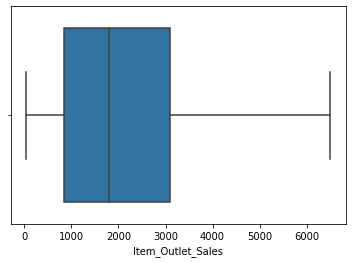

In [18]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lr = Q1 - (1.5 * IQR)
    ur = Q3 + (1.5 * IQR)
    return lr, ur

lessVis, moreVis = remove_outlier(dataset['Item_Outlet_Sales'])
dataset['Item_Outlet_Sales'] = np.where(dataset['Item_Outlet_Sales']>moreVis,moreVis,dataset['Item_Outlet_Sales'])
dataset['Item_Outlet_Sales'] = np.where(dataset['Item_Outlet_Sales']<lessVis,lessVis,dataset['Item_Outlet_Sales'])

sns.boxplot(dataset['Item_Outlet_Sales'])


In [19]:
dataset.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.010887
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.131600
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.574554
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.037133
Item_Outlet_Sales,0.010887,-0.131600,0.574554,-0.037133,1.000000


In [20]:
# from sklearn.preprocessing import StandardScaler
# std_scale = StandardScaler()
# std_scale

In [21]:
# dataset['Item_Weight'] = std_scale.fit_transform(dataset[['Item_Weight']])
# dataset['Item_Visibility'] = std_scale.fit_transform(dataset[['Item_Visibility']])
# dataset['Item_MRP'] = std_scale.fit_transform(dataset[['Item_MRP']])
# dataset.head()

c:\Users\Mayur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Visibility'>

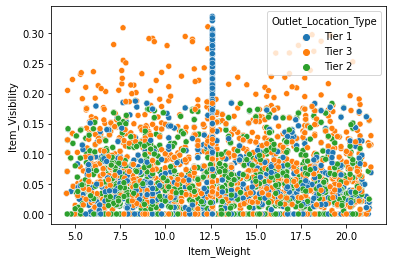

In [22]:
sns.scatterplot(dataset['Item_Weight'],dataset['Item_Visibility'],hue=dataset['Outlet_Location_Type'])

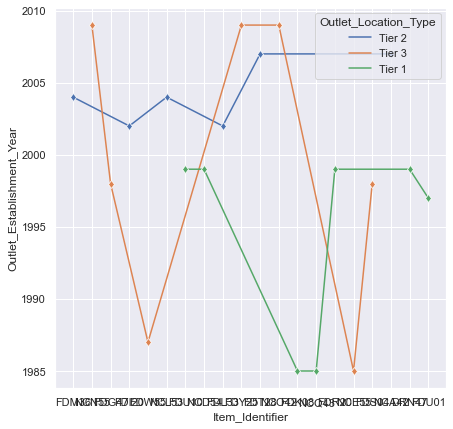

In [23]:
# plt.figure(figsize=(6,6))
# plt.plot(datasetr['Item_Identifier'],datasetr['Outlet_Establishment_Year'],markevery=1,marker='d')
# for name, group in datasetr.groupby(datasetr['Outlet_Type']):
#     plt.plot(datasetr['Item_Identifier'],datasetr['Outlet_Establishment_Year'],label=name,markevery=1,marker='d')
# plt.legend()
# plt.show()

sns.set(rc={'figure.figsize':(7,7)})
sns.set(font_scale=1.0)
fig=sns.lineplot(x=datasetr['Item_Identifier'],y=datasetr['Outlet_Establishment_Year'],markevery=1,marker='d',data=datasetr,hue=datasetr['Outlet_Location_Type'])


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_MRP'>

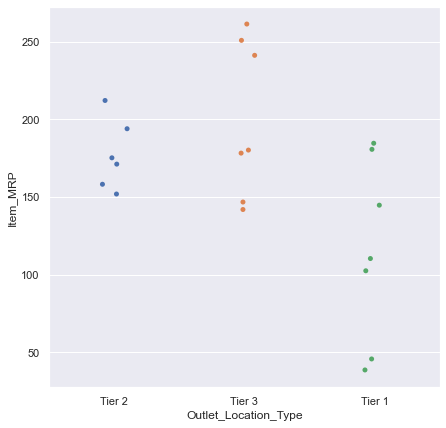

In [24]:
sns.stripplot(x=datasetr['Outlet_Location_Type'],y=datasetr['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

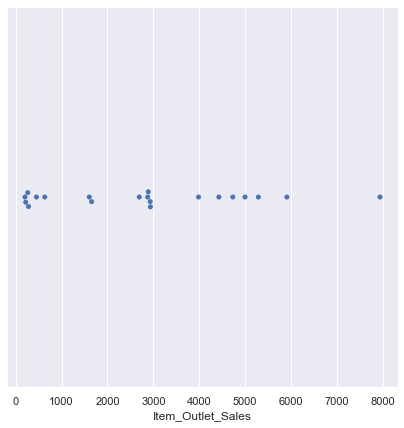

In [25]:
sns.swarmplot(x=datasetr['Item_Outlet_Sales'])

c:\Users\Mayur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

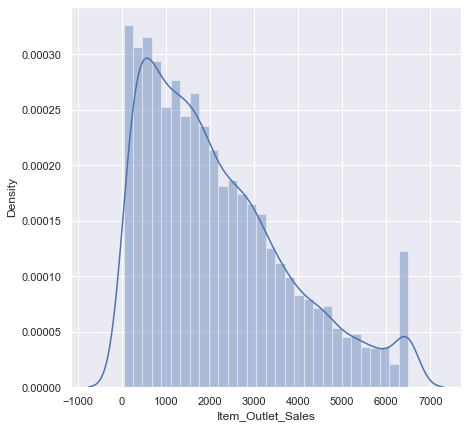

In [26]:
sns.distplot(dataset['Item_Outlet_Sales'])

<AxesSubplot:ylabel='Density'>

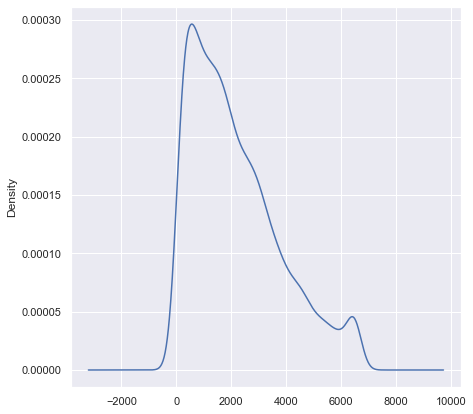

In [27]:
dataset['Item_Outlet_Sales'].plot(kind='density')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

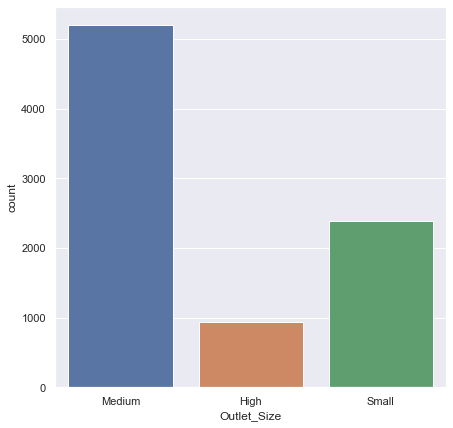

In [28]:
sns.countplot(x='Outlet_Size',data=dataset)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

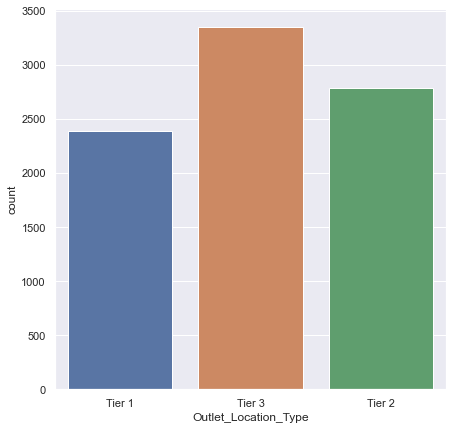

In [29]:
sns.countplot(x='Outlet_Location_Type',data=dataset)

c:\Users\Mayur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Item_Outlet_Sales'>

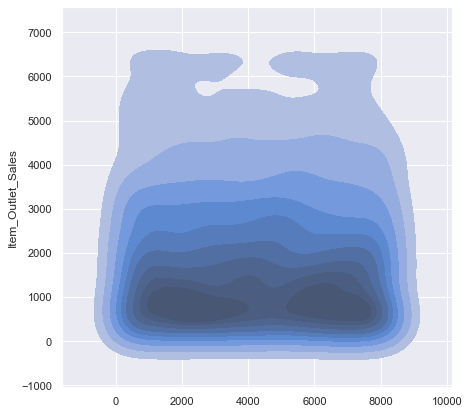

In [30]:
sns.kdeplot(dataset.index,dataset['Item_Outlet_Sales'],shade=True)

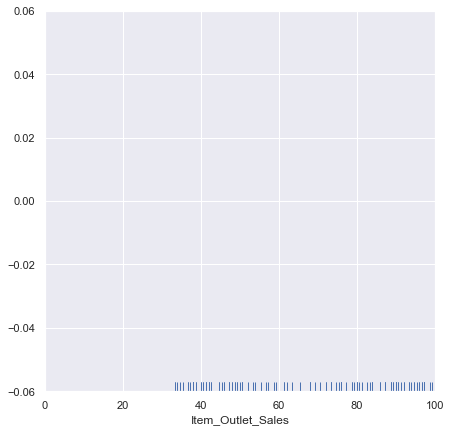

In [31]:
fig, ax = plt.subplots()
sns.rugplot(dataset['Item_Outlet_Sales'])
ax.set_xlim(0,100)
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x124c30609d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x124c3060940>,
 'cmins': <matplotlib.collections.LineCollection at 0x124c3061090>,
 'cbars': <matplotlib.collections.LineCollection at 0x124c3061450>,
 'cmedians': <matplotlib.collections.LineCollection at 0x124c3061810>}

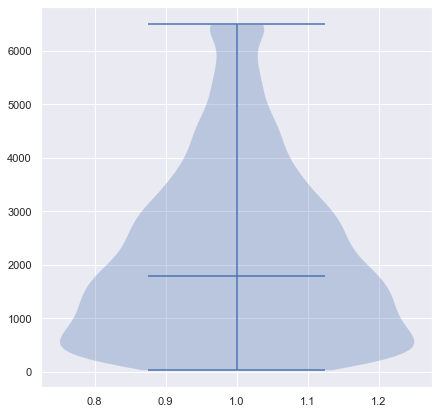

In [32]:
plt.violinplot(dataset['Item_Outlet_Sales'],showmedians=True)

c:\Users\Mayur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

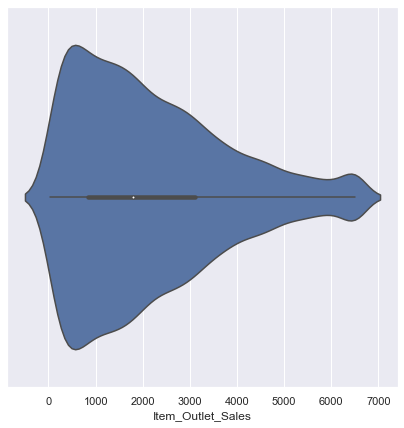

In [33]:
sns.violinplot(dataset['Item_Outlet_Sales'])

([<matplotlib.patches.Wedge at 0x124c283f160>,
 [Text(0.36266446547093334, 1.03849626166139, 'Tier 3'),
  Text(-1.0315659207596939, -0.3819316053002228, 'Tier 2'),
  Text(0.7006790317242327, -0.8479675079282176, 'Tier 1')],
 [Text(0.1978169811659636, 0.5664525063607582, '39.31'),
  Text(-0.5626723204143784, -0.20832633016375787, '32.68'),
  Text(0.38218856275867236, -0.4625277315972095, '28.02')])

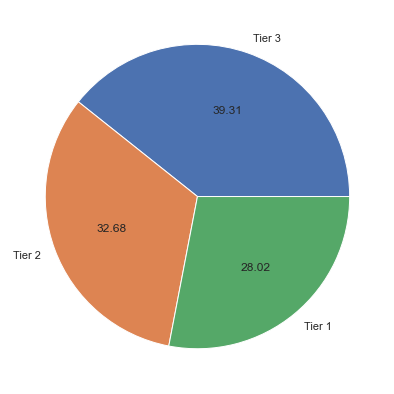

In [34]:
plt.pie(dataset['Outlet_Location_Type'].value_counts(),autopct='%.2f',labels=['Tier 3','Tier 2','Tier 1'])
# n = dataset.groupby(['Outlet_Location_Type']).size()
# print(n)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

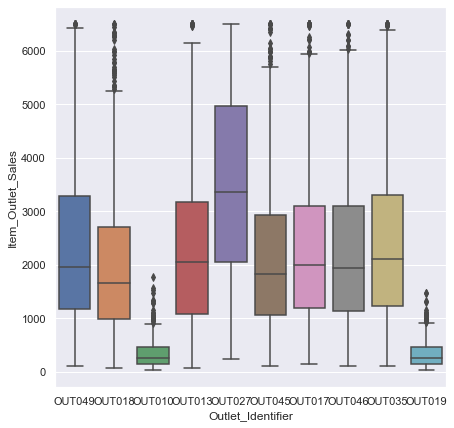

In [35]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=dataset)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

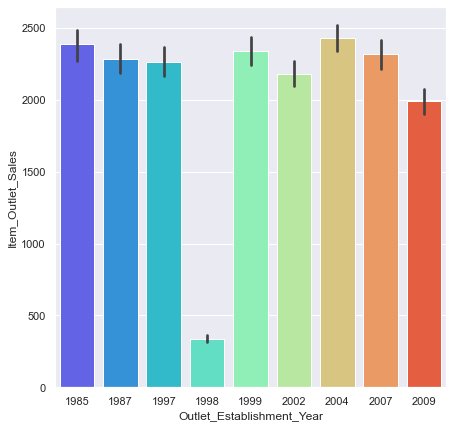

In [37]:
sns.barplot(y='Item_Outlet_Sales', x='Outlet_Establishment_Year',data=dataset,palette='rainbow')

Feature Engineering:

Converting categorical data into numerical

In [38]:
# dataset['Outlet_Location_Type_Encoded']  = dataset['Outlet_Location_Type'].replace({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})

# dataset[['Outlet_Location_Type', 'Outlet_Location_Type_Encoded']].head()

In [39]:
# Outlet_Type_Dumm = pd.get_dummies(data=dataset['Outlet_Type'], columns=['Outlet_Type'], drop_first=True)
# pd.concat([dataset['Outlet_Type'], Outlet_Type_Dumm], axis=1).head()

Binning using cut() & qcut()

In [40]:
#name of groups
groups = ['Low', 'Med', 'High', 'Exp']

dataset['Item_MRP_Bin_qcut'] = pd.qcut(dataset['Item_MRP'], q=4, labels=groups)
dataset[['Item_MRP', 'Item_MRP_Bin_qcut']].head()

,Item_MRP,Item_MRP_Bin_qcut
0,249.8092,Exp
1,48.2692,Low
2,141.6180,Med
3,182.0950,High
4,53.8614,Low


In [41]:
# Count of each category 
pd.DataFrame(dataset['Item_MRP_Bin_qcut'].value_counts())

,Item_MRP_Bin_qcut
Low,2131
Med,2131
Exp,2131
High,2130


In [42]:
#define bins 
bins = [0, 70, 140, 210, 280]
#name of groups
groups = ['Low', 'Med', 'High', 'Exp']
dataset['Item_MRP_Bin_cut'] = pd.cut(dataset['Item_MRP'], bins=bins, labels=groups)
dataset[['Item_MRP', 'Item_MRP_Bin_cut']].head()

,Item_MRP,Item_MRP_Bin_cut
0,249.8092,Exp
1,48.2692,Low
2,141.6180,High
3,182.0950,High
4,53.8614,Low


In [43]:
# Count of each category 
pd.DataFrame(dataset['Item_MRP_Bin_cut'].value_counts())

,Item_MRP_Bin_cut
High,3042
Med,2778
Exp,1362
Low,1341


Using apply() for Text Extraction:

In [44]:
dataset['Item_Code'] = dataset['Item_Identifier'].apply(lambda x: x[0:2])
dataset[['Item_Identifier', 'Item_Code']].head()

,Item_Identifier,Item_Code
0,FDA15,FD
1,DRC01,DR
2,FDN15,FD
3,FDX07,FD
4,NCD19,NC


Using value_counts() and apply() for Frequency Encoding:

In [45]:
# Frequency encoding using value_counts function 
Item_Type_freq = dataset['Item_Type'].value_counts(normalize=True)

# Mapping the encoded values with original data 
dataset['Item_Type_freq'] = dataset['Item_Type'].apply(lambda x : Item_Type_freq[x])

print('The sum of Item_Type_freq variable:', sum(Item_Type_freq))
dataset[['Item_Type', 'Item_Type_freq']].head(6)

The sum of Item_Type_freq variable: 1.0


,Item_Type,Item_Type_freq
0,Dairy,0.080019
1,Soft Drinks,0.052212
2,Meat,0.049865
3,Fruits and Vegetables,0.144550
4,Household,0.106770
5,Baking Goods,0.076030


Using groupby() and transform() for Aggregation Features

In [46]:
dataset['Item_Outlet_Sales_Mean'] = dataset.groupby(['Item_Identifier', 'Item_Type'])['Item_Outlet_Sales'].transform(lambda x: x.mean())
dataset[['Item_Identifier','Item_Type','Item_Outlet_Sales','Item_Outlet_Sales_Mean']].tail()

,Item_Identifier,Item_Type,Item_Outlet_Sales,Item_Outlet_Sales_Mean
8518,FDF22,Snack Foods,2778.3834,3232.542225
8519,FDS36,Baking Goods,549.2850,2636.568000
8520,NCJ29,Health and Hygiene,1193.1136,1221.521067
8521,FDN46,Snack Foods,1845.5976,2067.752867
8522,DRG01,Soft Drinks,765.6700,1225.072000


In [47]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_MRP_Bin_qcut,Item_MRP_Bin_cut,Item_Code,Item_Type_freq,Item_Outlet_Sales_Mean
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Exp,Exp,FD,0.080019,5198.067050
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low,Low,DR,0.052212,862.211000
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Med,High,FD,0.049865,1478.076000
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,High,High,FD,0.144550,3021.067500
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Low,Low,NC,0.106770,653.926567


Converting categorical data into numerical (Encoding):

In [48]:
dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [49]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
dataset['Item_Fat_Content']= label_encoder.fit_transform(dataset['Item_Fat_Content'])
dataset['Item_Fat_Content'].unique()

array([1, 2, 3, 0, 4])

In [50]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
dataset['Item_Type']= label_encoder.fit_transform(dataset['Item_Type'])
dataset['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [51]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
dataset['Outlet_Size']= label_encoder.fit_transform(dataset['Outlet_Size'])
dataset['Outlet_Size'].unique()

array([1, 0, 2])

In [52]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
dataset['Outlet_Type']= label_encoder.fit_transform(dataset['Outlet_Type'])
dataset['Outlet_Type'].unique()

array([1, 2, 0, 3])

In [53]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
dataset['Outlet_Location_Type']= label_encoder.fit_transform(dataset['Outlet_Location_Type'])
dataset['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [54]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
dataset['Outlet_Identifier']= label_encoder.fit_transform(dataset['Outlet_Identifier'])
dataset['Outlet_Identifier'].unique()

dataset['Item_Identifier']= label_encoder.fit_transform(dataset['Item_Identifier'])
dataset['Item_Identifier'].unique()

dataset['Item_MRP_Bin_qcut']= label_encoder.fit_transform(dataset['Item_MRP_Bin_qcut'])
dataset['Item_MRP_Bin_qcut'].unique()

dataset['Item_MRP_Bin_cut']= label_encoder.fit_transform(dataset['Item_MRP_Bin_cut'])
dataset['Item_MRP_Bin_cut'].unique()

dataset['Item_Code']= label_encoder.fit_transform(dataset['Item_Code'])
dataset['Item_Code'].unique()

array([1, 0, 2])

In [55]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_MRP_Bin_qcut,Item_MRP_Bin_cut,Item_Code,Item_Type_freq,Item_Outlet_Sales_Mean
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,0,0,1,0.080019,5198.067050
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,2,2,0,0.052212,862.211000
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,3,1,1,0.049865,1478.076000
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800,1,1,1,0.144550,3021.067500
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052,2,2,2,0.106770,653.926567


Data Preprocessing:

In [56]:
#Splitting The data  into Train and Test Dataset:
from sklearn.model_selection import train_test_split
#Independent Variables:
x = dataset.drop("Item_Outlet_Sales", axis = 1) 

#Depenedent Variables 
y = dataset["Item_Outlet_Sales"].values.reshape(-1,1)
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

Linear Regression:

In [57]:
#Applying Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [58]:
#Prediction
y_pred = regressor.predict(x_test)

In [59]:
#Accuracy of Model (Apply R2_score)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6048970064426968

RandomForest:

In [60]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(x_train,y_train)

C:\Users\Mayur\AppData\Local\Temp\ipykernel_15604\34342776.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfg.fit(x_train,y_train)


RandomForestRegressor()

In [61]:
predicted=rfg.predict(x_test)

In [62]:
print("SCORE",rfg.score(x_test,y_test))

SCORE 0.6240872192898124


XGBoost:

In [63]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(x_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [64]:
predictions = my_model.predict(x_test)
print("SCORE",my_model.score(x_test,y_test))

SCORE 0.6182016017426382


Comparing All Models

Linear Regression score: 0.604

Random Forest Regression Score: 0.623

XGBoost Regression Score: 0.618

We can see that Random Forest Regression model gave us the best score for our testing data. Therefore Random Forest Regression is better than the other models.

Summary:

-Firstly we studiedthe dataset i.e Big Mart Sales Analysis and understood the meaning of each columns. 

-Then we performed Exploratory Data Analysis on our dataset. 

-We plotted various Univariate and Bi-variate plots to study the relationship between various features. 

-Then we cleaned our data and also performed feature enginnering.

-We trained our model and predicted values for Item_Outlet_sales. 